In [15]:
import numpy as np
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from great_tables import style, loc
import great_tables as gt

In [16]:
df = pl.read_csv("../../DATA/penguins_size.csv")

In [17]:
df = df.filter(
    pl.fold(
        acc=pl.lit(True),
        function=lambda acc, s: acc & (s != "NA"),
        exprs=pl.all()
    )
)

In [18]:
df

species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
str,str,str,str,str,str,str
"""Adelie""","""Torgersen""","""39.1""","""18.7""","""181""","""3750""","""MALE"""
"""Adelie""","""Torgersen""","""39.5""","""17.4""","""186""","""3800""","""FEMALE"""
"""Adelie""","""Torgersen""","""40.3""","""18""","""195""","""3250""","""FEMALE"""
"""Adelie""","""Torgersen""","""36.7""","""19.3""","""193""","""3450""","""FEMALE"""
"""Adelie""","""Torgersen""","""39.3""","""20.6""","""190""","""3650""","""MALE"""
…,…,…,…,…,…,…
"""Gentoo""","""Biscoe""","""47.2""","""13.7""","""214""","""4925""","""FEMALE"""
"""Gentoo""","""Biscoe""","""46.8""","""14.3""","""215""","""4850""","""FEMALE"""
"""Gentoo""","""Biscoe""","""50.4""","""15.7""","""222""","""5750""","""MALE"""


In [19]:
df.with_columns(
    cs.all() == 'NA'
).sum()

species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0


In [20]:
df['sex'].unique()

sex
str
"""."""
"""FEMALE"""
"""MALE"""


In [21]:
df = df.filter(pl.col("sex") != ".")

In [22]:
df

species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
str,str,str,str,str,str,str
"""Adelie""","""Torgersen""","""39.1""","""18.7""","""181""","""3750""","""MALE"""
"""Adelie""","""Torgersen""","""39.5""","""17.4""","""186""","""3800""","""FEMALE"""
"""Adelie""","""Torgersen""","""40.3""","""18""","""195""","""3250""","""FEMALE"""
"""Adelie""","""Torgersen""","""36.7""","""19.3""","""193""","""3450""","""FEMALE"""
"""Adelie""","""Torgersen""","""39.3""","""20.6""","""190""","""3650""","""MALE"""
…,…,…,…,…,…,…
"""Gentoo""","""Biscoe""","""47.2""","""13.7""","""214""","""4925""","""FEMALE"""
"""Gentoo""","""Biscoe""","""46.8""","""14.3""","""215""","""4850""","""FEMALE"""
"""Gentoo""","""Biscoe""","""50.4""","""15.7""","""222""","""5750""","""MALE"""


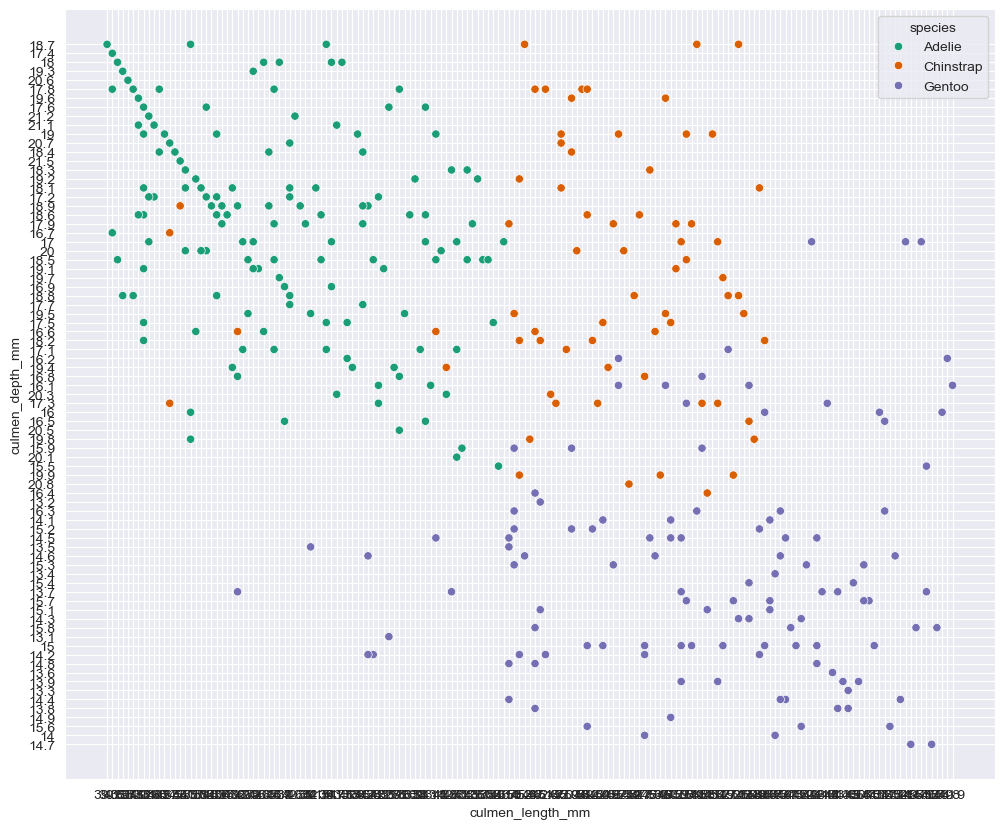

In [23]:
plt.figure(figsize=(12, 10), dpi=100)
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species',palette='Dark2')
plt.show()

In [24]:
X = df.select(cs.exclude(['species'])).to_dummies(drop_first=True)

In [25]:
y = df['species']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
model = DecisionTreeClassifier()

In [30]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
base_pred = model.predict(X_test)

In [40]:
base_pred = pl.Series(base_pred)

In [43]:
pl.DataFrame({
    'predictions': base_pred,
    'actual': y_test,
    'correct': base_pred == y_test,
    'incorrect': base_pred != y_test,
    'accuracy': (base_pred == y_test).mean()
})

predictions,actual,correct,incorrect,accuracy
str,str,bool,bool,f64
"""Chinstrap""","""Chinstrap""",true,false,0.74
"""Gentoo""","""Gentoo""",true,false,0.74
"""Chinstrap""","""Adelie""",false,true,0.74
"""Adelie""","""Adelie""",true,false,0.74
"""Adelie""","""Chinstrap""",false,true,0.74
…,…,…,…,…
"""Gentoo""","""Gentoo""",true,false,0.74
"""Chinstrap""","""Adelie""",false,true,0.74
"""Gentoo""","""Gentoo""",true,false,0.74


In [44]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [45]:
accuracy_score(y_test, base_pred)

0.74

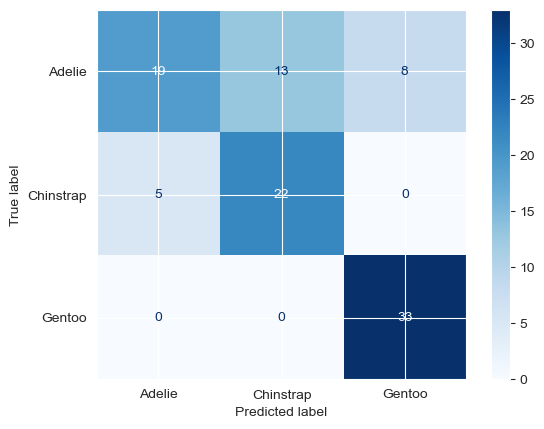

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test, base_pred, cmap='Blues')

In [47]:
from sklearn.tree import plot_tree

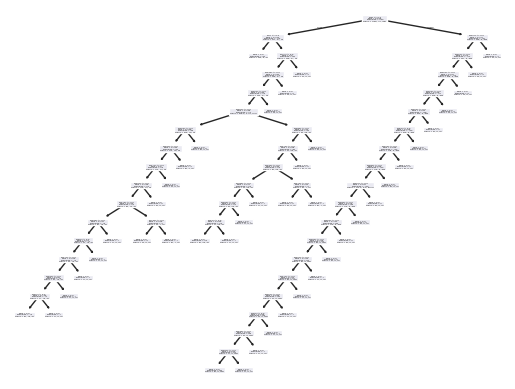

In [49]:
plot_tree(model);